In [1]:
from scipy.io import netcdf
from scipy.io import loadmat
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
from python_functions import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
times = [181,186,192,212,233,263]
run_pert0 = readfiles.StateRead()        
run_pert0.readData('/scratch/general/am8e13/results_restore/',range(0,605,2))
run_pert0.title('The old perturbation run')
run_pert0.baroCalc()
run_pert0.topoCalc()
run_pert0.fluxCalc()

run_pert2 = readfiles.StateRead()        
run_pert2.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/',range(0,605,2))
run_pert2.title('First new run, no restore to normal')
run_pert2.baroCalc()
run_pert2.topoCalc()
run_pert2.fluxCalc()

run_pert1 = readfiles.StateRead()        
run_pert1.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation1/results/',range(0,605,2))
run_pert1.title('First new run with restore to normal')
run_pert1.baroCalc()
run_pert1.topoCalc()
run_pert1.fluxCalc()

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [3]:
!ncdump -h /scratch/general/am8e13/results_restore/state.nc

ncdump: /usr/lib64/libjpeg.so.62: no version information available (required by ncdump)
netcdf state {
dimensions:
	T = UNLIMITED ; // (606 currently)
	Xp1 = 211 ;
	Y = 192 ;
	Z = 50 ;
	X = 210 ;
	Yp1 = 193 ;
	Zl = 50 ;

variables:
	double Xp1(Xp1) ;
		Xp1:long_name = "i-index of cell corner" ;
		Xp1:units = "none" ;
	double Y(Y) ;
		Y:long_name = "j-index of cell center" ;
		Y:units = "none" ;
	double Z(Z) ;
		Z:long_name = "vertical coordinate of cell center" ;
		Z:units = "meters" ;
		Z:positive = "up" ;
	double X(X) ;
		X:long_name = "i-index of cell center" ;
		X:units = "none" ;
	double Yp1(Yp1) ;
		Yp1:long_name = "j-index of cell corner" ;
		Yp1:units = "none" ;
	double Zl(Zl) ;
		Zl:long_name = "vertical coordinate of upper cell interface" ;
		Zl:units = "meters" ;
		Zl:positive = "up" ;
	double T(T) ;
		T:long_name = "model_time" ;
		T:units = "seconds since 1979-01-01, 00:00:00" ;
	long iter(T) ;
		iter:long_name = "iteration_count" ;
	float U(T, Z, Y, Xp1) ;
		U:units = "m/

In [4]:
pert0 = MonitorRead()        
pert0.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_restore/results/',\
               [10069920,10588320,10614240,10717920,10743840,11262240])
pert0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_restore/results/',\
                    [10069920,10588320,10614240,10717920,10743840,11262240])
pert0.title('Old restore run','blue')

pert1 = MonitorRead()        
pert1.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation1/results/',\
               [5702400,6220800,6246720,6350400,6454080,6972480])
pert1.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation1/results/',\
                    [5702400,6220800,6246720,6350400,6454080,6972480])
pert1.title('First new run with restore to normal','red')

pert2 = MonitorRead()        
pert2.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/',[5702400,6220800,6246720,6972480])
pert2.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/',[5702400,6220800,6246720,6972480])
pert2.title('First new run, no restore to normal','black')

In [5]:
titles = {'theta_mean' : 'Temperature Mean', 'theta_min' : 'Temperature Min', 'theta_max' :  'Temperature Max', \
            'eta_mean' : 'ETA mean', 'eta_max' : 'ETA max', 'eta_min' : 'ETA min', 'salt_mean' : 'Salinity Mean' , \
            'salt_max' : 'Salinity Max' , 'salt_min' : 'Salinity Min' , 'sss_mean': 'SSS mean' , \
            'sss_max' : 'SSS max', 'sss_min' : 'SSS min', 'sst_mean' : 'SST mean', 'sst_max' : 'SST max' , \
            'sst_min' : 'SST min', 'vvel_mean' : 'V mean', 'vvel_max' : 'V max' , 'vvel_min' : 'V min', \
            'uvel_mean' : 'U mean', 'uvel_max' : 'U max', 'uvel_min' : 'U min', 'ke_mean' : 'Kinetic mean', \
            'ke_max' : 'Kinetic max', 'ke_vol' : 'Kinetic volume', 'seaice_area_max' : 'Seaice area max', \
            'seaice_area_min' : 'Seaice area min', 'seaice_area_mean' : 'Seaice area mean', \
            'seaice_heff_max' : 'Seaice thickness max', 'seaice_heff_min' : 'Seaicea thickness max', \
            'seaice_heff_mean' : 'Seaice thickness mean', 'time_seconds' : 'Time seconds' , \
          'time_years' : 'Time years'} 
unity = {'theta_mean' : 'C', 'theta_min' : 'C', 'theta_max' :  'C', \
            'eta_mean' : 'm', 'eta_max' : 'm', 'eta_min' : 'm', 'salt_mean' : 'psu' , \
            'salt_max' : 'psu' , 'salt_min' : 'psu' , 'sss_mean': 'psu' , \
            'sss_max' : 'psu', 'sss_min' : 'psu', 'sst_mean' : 'C', 'sst_max' : 'C' , \
            'sst_min' : 'C', 'vvel_mean' : 'm/s', 'vvel_max' : 'm/s' , 'vvel_min' : 'm/s', \
            'uvel_mean' : 'm/s', 'uvel_max' : 'm/s', 'uvel_min' : 'm/s', 'ke_mean' : 'm^2/s^2', \
            'ke_max' : 'm^2/s^2', 'ke_vol' : 'm^2/s^2', 'seaice_area_max' : '%', \
            'seaice_area_min' : '%', 'seaice_area_mean' : '%', \
            'seaice_heff_max' : 'm', 'seaice_heff_min' : 'm', \
            'seaice_heff_mean' : 'm', 'time_seconds' : 's' , \
          'time_years' : 'Years'} 
titles_lv = { 
                'run_ERA_tempcorr0' : 'ERA run with OBS*0.5' , 'run_JRA_tempcorr0' : 'JRA run with OBS*0.5', \
                'run_ERA_tempcorr1' : 'ERA run with OBS*0.8' , 'run_JRA_tempcorr1' : 'JRA run with OBS*0.8', \
                'run_ERA_tempcorr2' : 'ERA run with OBS*0.65' , 'run_JRA_tempcorr2' : 'JRA run with OBS*0.65'
            }

In [6]:
monitor_list = {'pert1' : pert1, 'pert2' : pert2, 'pert0' : pert0}

In [7]:
# free-surface_anomaly evolution
def plot_monitor(var_list,monitor_list):
    fig, axes = plt.subplots(2,2)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            axes.flat[ax_ind].plot(monitor_list[mon].data['time_years'],monitor_list[mon].data[var],monitor_list[mon].color)
            if ax_ind == 0:
                print monitor_list[mon].title, monitor_list[mon].color
        axes.flat[ax_ind].set_ylabel(unity[var])
        axes.flat[ax_ind].set_title(titles[var])
        ax_ind += 1
        
    fig.subplots_adjust(right=2.4,top=2.4)

Old restore run blue
First new run with restore to normal red
First new run, no restore to normal black


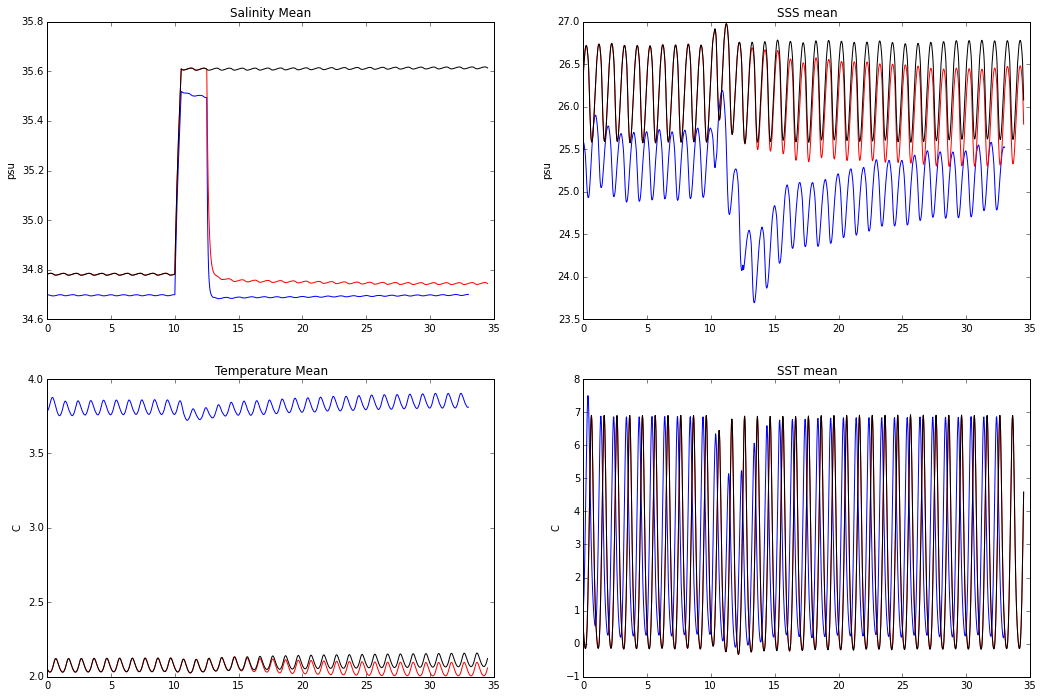

In [8]:
plot_monitor(['salt_mean','sss_mean','theta_mean','sst_mean'],monitor_list)

Old restore run blue
First new run with restore to normal red
First new run, no restore to normal black


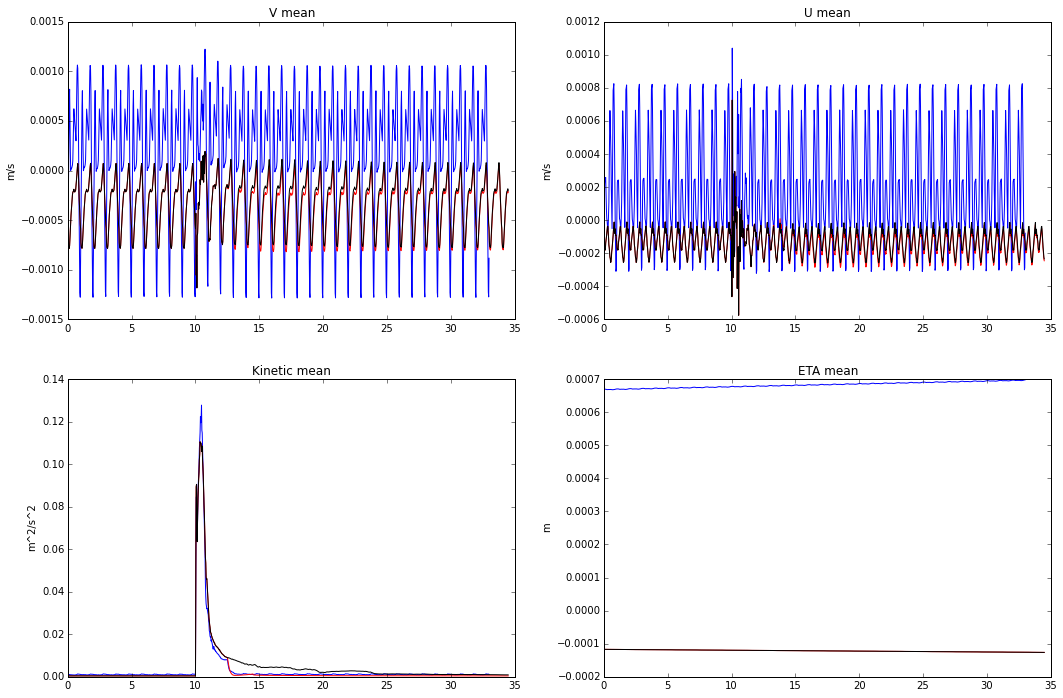

In [9]:
plot_monitor(['vvel_mean','uvel_mean','ke_mean','eta_mean'],monitor_list)

Old restore run blue
First new run with restore to normal red
First new run, no restore to normal black


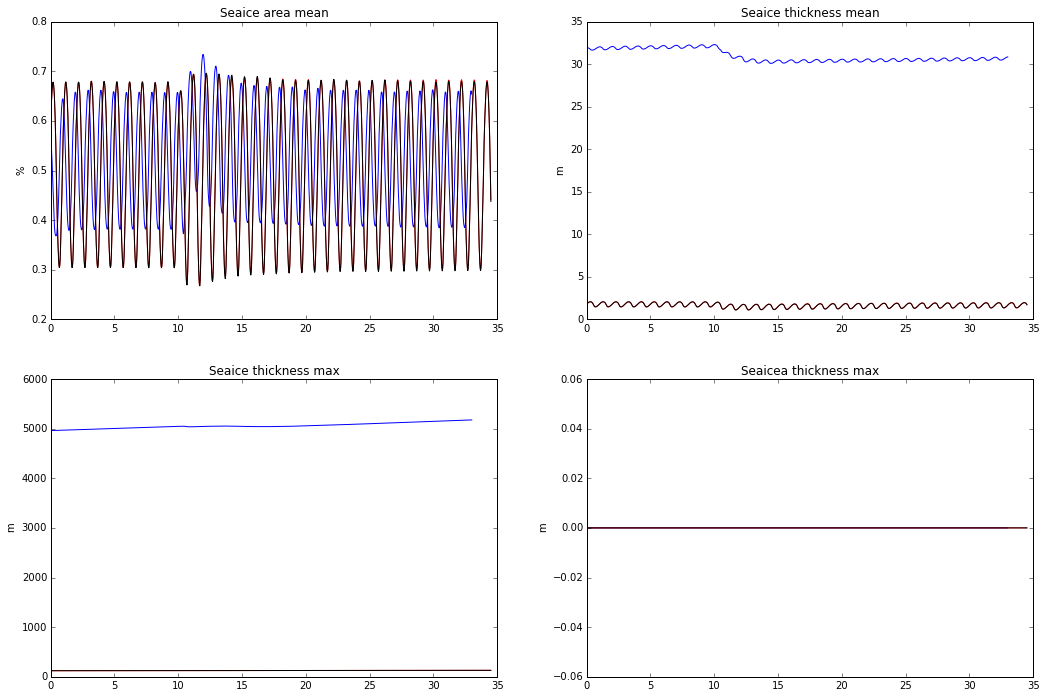

In [10]:
plot_monitor(['seaice_area_mean','seaice_heff_mean','seaice_heff_max','seaice_heff_min'],monitor_list)

First new run with restore to normal red
First new run, no restore to normal black
First new run with restore to normal red
First new run, no restore to normal black
First new run with restore to normal red
First new run, no restore to normal black


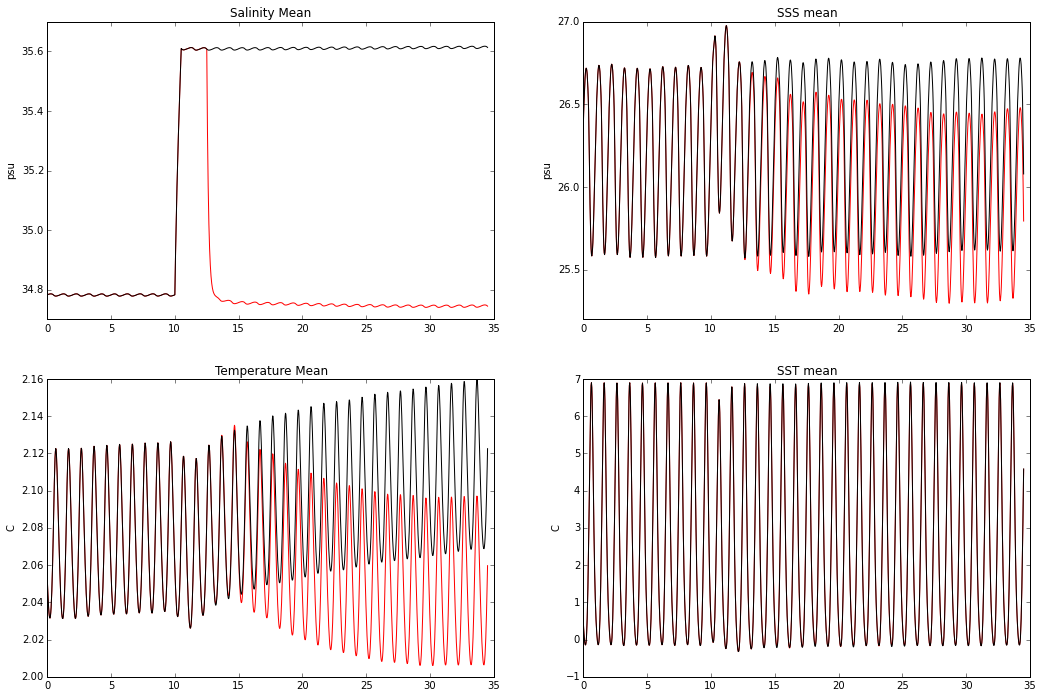

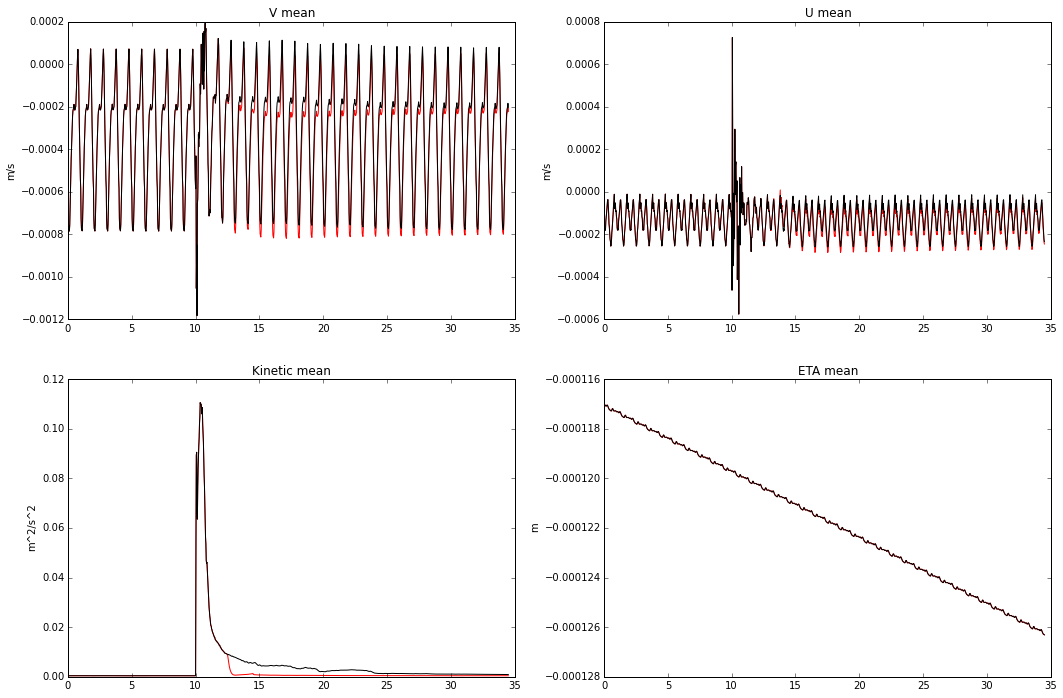

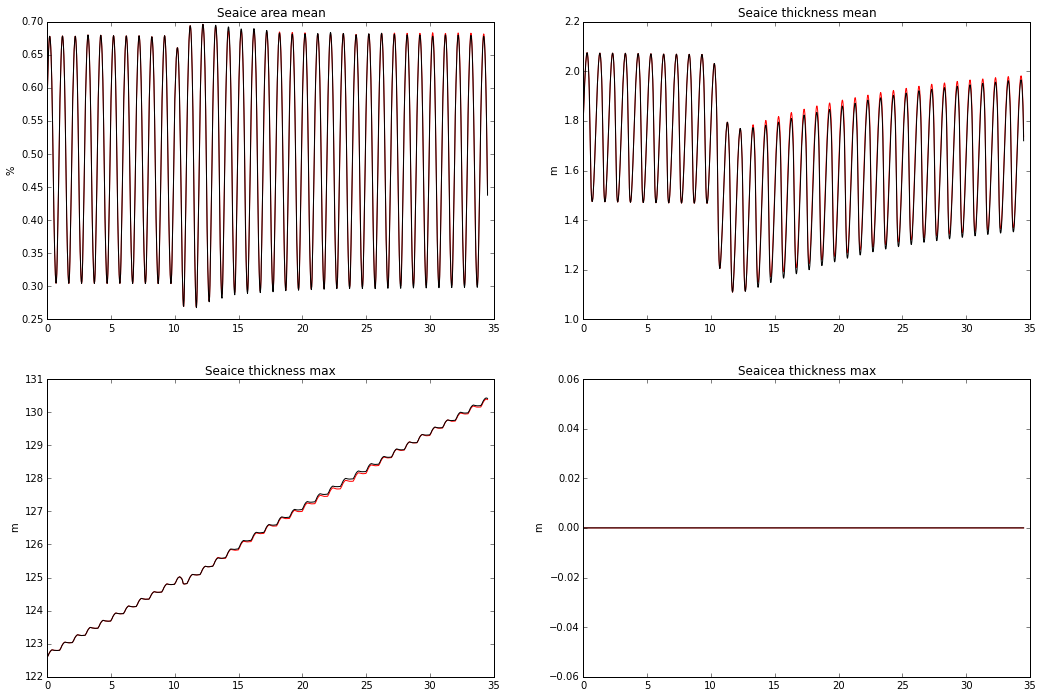

In [11]:
monitor_list = {'pert1' : pert1, 'pert2' : pert2}
plot_monitor(['salt_mean','sss_mean','theta_mean','sst_mean'],monitor_list)
plot_monitor(['vvel_mean','uvel_mean','ke_mean','eta_mean'],monitor_list)
plot_monitor(['seaice_area_mean','seaice_heff_mean','seaice_heff_max','seaice_heff_min'],monitor_list)

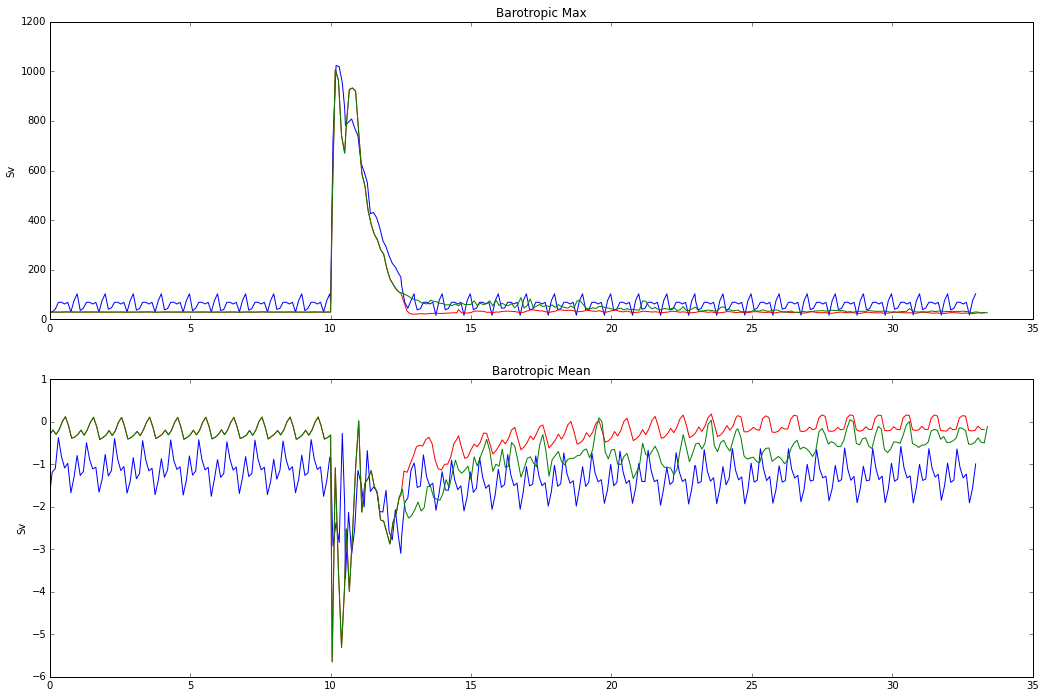

In [12]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(2,1)
axes[0].plot(run_pert0.years,run_pert0.psi_max,'blue')
axes[0].plot(run_pert1.years,run_pert1.psi_max,'red')
axes[0].plot(run_pert2.years,run_pert2.psi_max,'green')
axes[0].set_ylabel('Sv')
axes[0].set_title('Barotropic Max')

axes[1].plot(run_pert0.years,run_pert0.psi_mean,'blue')
axes[1].plot(run_pert1.years,run_pert1.psi_mean,'red')
axes[1].plot(run_pert2.years,run_pert2.psi_mean,'green')
axes[1].set_ylabel('Sv')
axes[1].set_title('Barotropic Mean')

fig.subplots_adjust(right=2.4,top=2.4)


In [13]:
#plot_field(np.nanmean(run_pert0.data['T'][:,0:5,:,:],axis=1),run_pert0.years,0,20,matplotlib.cm.jet,'grey','C')
#plot_field(np.mean(run_pert0.data['S'][:,0:5,:,:],axis=1),run_pert0.years,25,37,matplotlib.cm.winter,'black','psu')
#plot_field(run_pert0.psi,run_pert0.years,-200,200,matplotlib.cm.seismic,'black','Sv')

In [14]:
#plot_field(np.nanmean(run_pert1.data['T'][:,0:5,:,:],axis=1),run_pert1.years,0,20,matplotlib.cm.jet,'grey','C')
#plot_field(np.mean(run_pert1.data['S'][:,0:5,:,:],axis=1),run_pert1.years,25,37,matplotlib.cm.winter,'black','psu')
#plot_field(run_pert0.psi,run_pert1.years,-200,200,matplotlib.cm.seismic,'black','Sv')

In [15]:
#plot_field(np.nanmean(run_pert2.data['T'][:,0:5,:,:],axis=1),run_pert2.years,0,20,matplotlib.cm.jet,'grey','C')
#plot_field(np.mean(run_pert2.data['S'][:,0:5,:,:],axis=1),run_pert2.years,25,37,matplotlib.cm.winter,'black','psu')
#plot_field(run_pert0.psi,run_pert2.years,-200,200,matplotlib.cm.seismic,'black','Sv')

In [16]:
file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
Z = file2read1.variables['Zp1']
Z = Z[0:50]*1
hfacc = file2read1.variables['HFacC']
hfacc = hfacc[:]*1
monitor_list = {'pert1' : pert1, 'pert2' : pert2, 'pert0' : pert0}

monitor_list['pert1'].dataDyn['salt_lv_mean'].shape
vimins = {'salt_lv_mean': 32 , 'theta_lv_mean' : 0,'salt_lv_max': 32 ,'theta_lv_max': 0, 'theta_lv_min':-3 }
vimaxs = {'salt_lv_mean': 37 , 'theta_lv_mean' : 8, 'salt_lv_max': 70 ,'theta_lv_max': 20 , 'theta_lv_min':3}

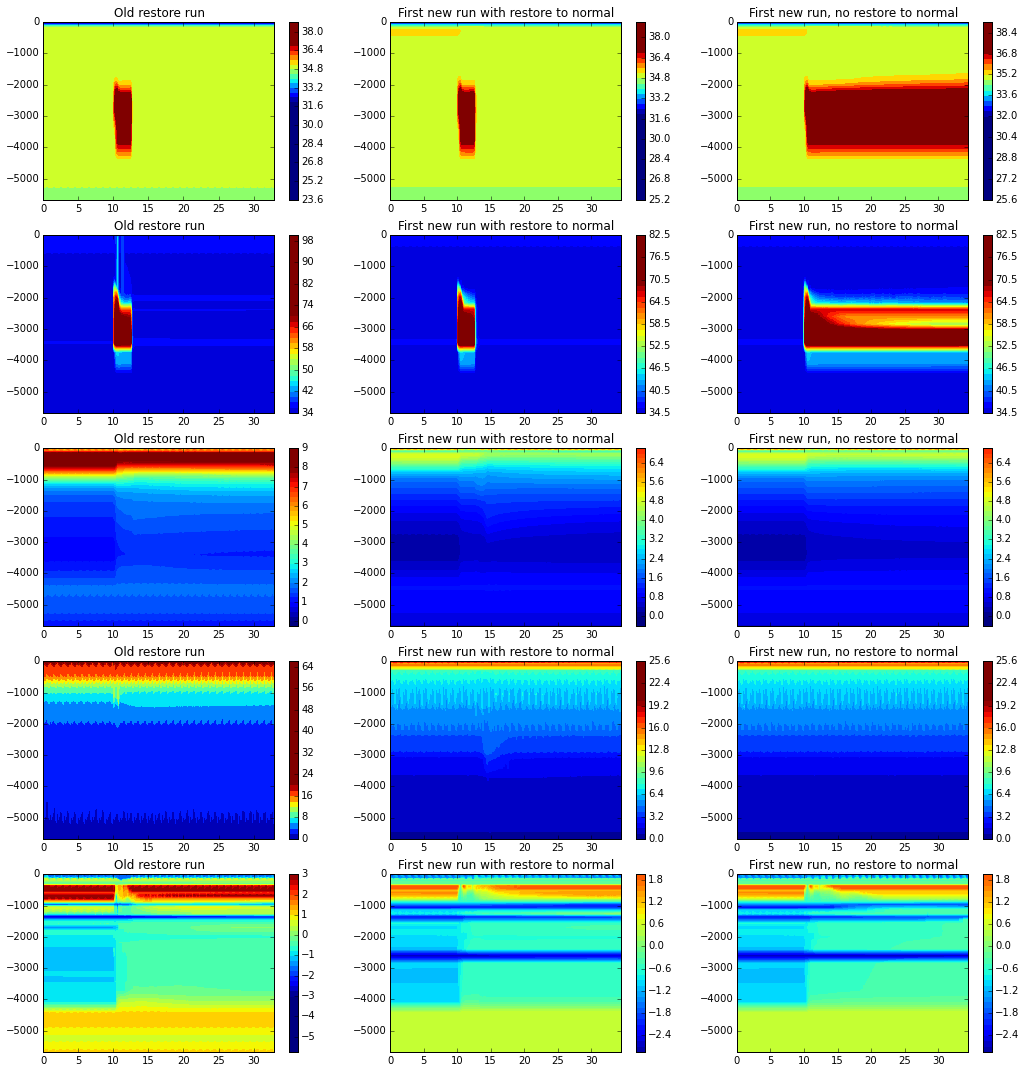

In [17]:
# free-surface_anomaly evolution
def plot_dynmon(var_list):
    fig, axes = plt.subplots(5,3)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            ca = axes.flat[ax_ind].contourf(monitor_list[mon].dataDyn['time_lv_years'],Z,monitor_list[mon].dataDyn[var].T,40,vmin=vimins[var],vmax=vimaxs[var])
            axes.flat[ax_ind].set_title(monitor_list[mon].title)
            cbar = fig.colorbar(ca , ax=axes.flat[ax_ind],boundaries=[1,1])
            #cbar.set_clim(vimins[var],vimaxs[var])
            ax_ind += 1
        if ((ax_ind//3) == 0):
            axes.flat[ax_ind].set_ylabel(var)
            
            
    fig.subplots_adjust(right=2.4,top=3.7)
plot_dynmon(['salt_lv_mean','salt_lv_max','theta_lv_mean','theta_lv_max','theta_lv_min'])

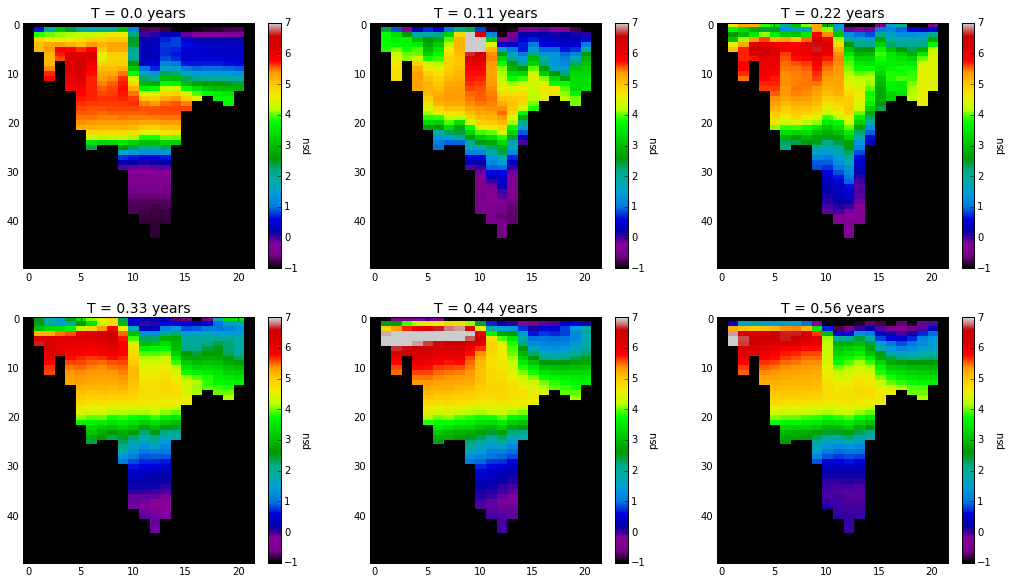

In [30]:
# coordinates for fram strait 76,76,60,77
# coordinates fro bering strait e50,65,52,52

def plot_field(field,years,vimin,vimax,cmap,setbad,unity,origin="lower"):
    # This function plots a 2D field, the field is meant to have NaNs on the land place                                 
    # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar           
    # cmap is a colomap                                                                                                 
    fig, axes = plt.subplots(nrows=2, ncols=3)
    i=0
    vimin = vimin
    vimax = vimax

    for ax in axes.flat:
        ax.set_title("T = "+str(np.round(years[i],2))+" years")
        masked_array = np.ma.array(field[i,:,:], mask=np.isnan(field[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap,aspect='auto',origin=origin)
        cbar = fig.colorbar(ca , ax=ax)
        cbar.ax.set_ylabel(unity)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)
        i=i+1

    fig.subplots_adjust(right=2.4,top=2)
time_new = np.array(times)/2
#plot_field(run_pert2.data['S'][time_new,:,58:80,76],run_pert2.years,25,37,matplotlib.cm.Accent,'black','psu','upper')
#plot_field(run_pert2.data['V'][time_new,:,58:80,76],run_pert2.years,-1,1,matplotlib.cm.seismic,'black','psu','upper')
plot_field(run_pert2.data['T'][time_new,:,58:80,76],run_pert2.years,-1,7,matplotlib.cm.spectral,'black','psu','upper')


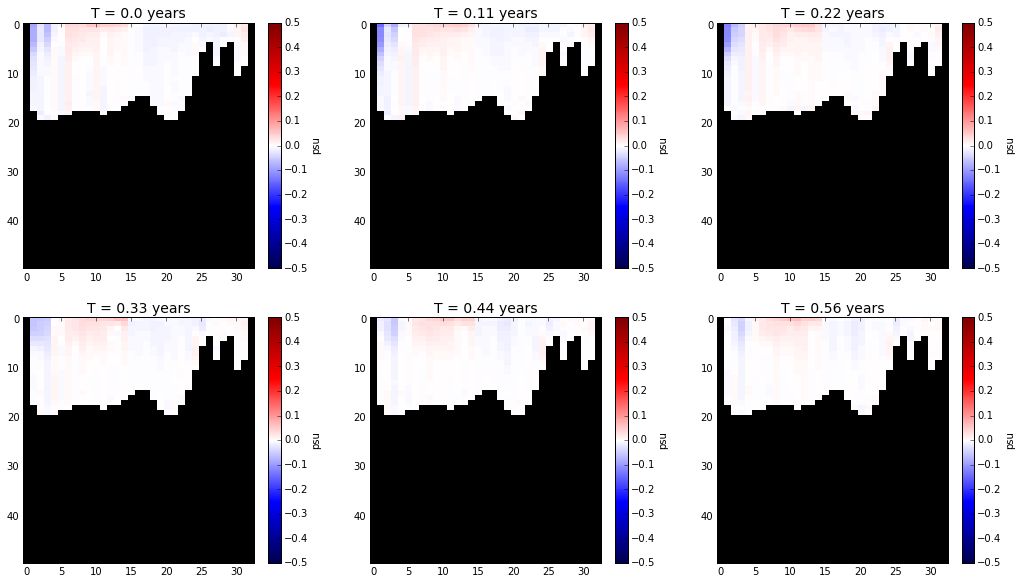

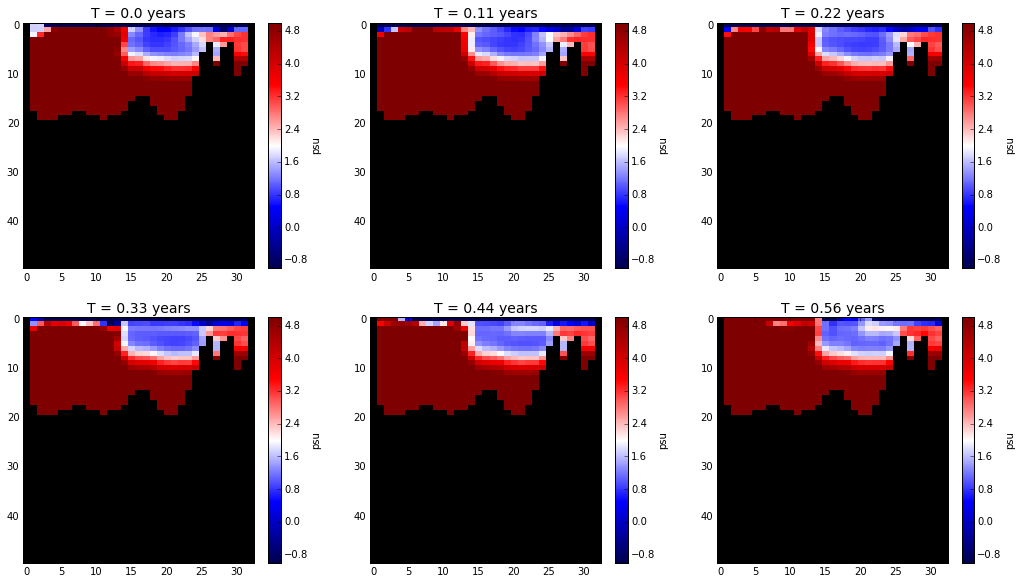

In [31]:
aa = np.concatenate((run_pert2.data['V'][:,:,40,53:68],run_pert2.data['U'][:,:,40:58,68]),axis=2)
plot_field(aa,run_pert2.years,-0.5,0.5,matplotlib.cm.seismic,'black','psu','upper')

aa = np.concatenate((run_pert2.data['T'][:,:,40,53:68],run_pert2.data['T'][:,:,40:58,68]),axis=2)
plot_field(aa,run_pert2.years,-1,5,matplotlib.cm.seismic,'black','psu','upper')

In [32]:
class StateRead1:
    def __init__(self):
        self.data = {'T' : [], 'V' : [], 'U' : [] , 'S' : [], 'days' : [], 'years' : []}
        self.psi = []
        self.psi_mean = []
        self.psi_max = []
        self.psi_min = []
        self.years = []
        self.res = []
        self.grid = []

    def readData(self,path,list_var):
        file2read = netcdf.NetCDFFile(path+'state.nc','r')
        Temp=file2read.variables['Temp']
        self.data['T']=Temp[list_var]*1
        V=file2read.variables['V']
        self.data['V']=V[list_var]*1
        U=file2read.variables['U']
        self.data['U']=U[list_var]*1
        S=file2read.variables['S']
        self.data['S']=S[list_var]*1
        days=file2read.variables['T']
        self.data['days']=days[list_var]*1
        self.years = (self.data['days'] - self.data['days'][0])/(60*60*24*360)

                                                                                    
        if self.data['T'].shape[3] == 210:
            self.grid = "/scratch/general/am8e13/results36km/grid.nc"
            self.res = 36
        elif self.data['T'].shape[3] == 420:
            self.grid = "/scratch/general/am8e13/results18km/grid.nc"
            self.res = 18
        elif self.data['T'].shape[3] == 840:
            self.grid = "/scratch/general/am8e13/results9km/grid.nc"
            self.res = 9
        file2read = netcdf.NetCDFFile(self.grid,'r')
        
        # Bathy is 1 on land and 0 over sea 
        hfacc = file2read.variables['HFacC']
        hfacc = hfacc[:]*1
        hfacw = file2read.variables['HFacW']
        hfacw = hfacw[:]*1
        hfacs = file2read.variables['HFacS']
        hfacs = hfacs[:]*1
        self.data['T'][:,hfacc==0] = np.nan
        self.data['U'][:,hfacw==0] = np.nan
        self.data['V'][:,hfacs==0] = np.nan
        self.data['S'][:,hfacc==0] = np.nan

    def fluxCalc(self):
        # This function calculates 
        #establish
        if self.res == 36:
            kk = 1
        elif self.res == 18:
            kk = 2
        elif self.res == 9:
            kk = 4
        self.grid
        file2read = netcdf.NetCDFFile(self.grid,'r')
        hfacc = file2read.variables['HFacC']
        hfacc = hfacc[:]*1
        drf = file2read.variables['drF']
        drf = drf[:]*1
        rA = file2read.variables['rA']
        rA = rA[:]*1
        dyF = file2read.variables['dyF']
        dyF = dyF[:]*1
        dxF = file2read.variables['dxF']
        dxF = dxF[:]*1
        dydx = np.zeros_like(hfacc)
        for k in range(len(drf)):
            dydx[k,:,:] = drf[k]*rA*hfacc[k,:,:]
        Area_x = dydx/dyF
        Area_y = dydx/dxF
        Area_x[hfacc==0]=np.nan
        Area_y[hfacc==0]=np.nan
        
        self.Fram = {'Flux' : np.zeros_like(self.data['V'][:,:,58*kk:80*kk,76*kk]) , \
                        'FluxSum' : np.zeros_like(self.data['V'][:,0,0,0]),\
                        'FluxS' : np.zeros_like(self.data['S'][:,:,58*kk:80*kk,76*kk]),\
                        'FluxSumS' : np.zeros_like(self.data['S'][:,0,0,0]),\
                        'FluxT' : np.zeros_like(self.data['T'][:,:,58*kk:80*kk,76*kk]),\
                        'FluxSumT' : np.zeros_like(self.data['T'][:,0,0,0]),\
                        'FluxTop' : [], 'FluxMid' : [] , 'FluxBot' : [], \
                        'FluxTopS' : [], 'FluxMidS' : [] , 'FluxBotS' : [], \
                        'FluxTopT' : [], 'FluxMidT' : [] , 'FluxBotT' : []}
        
        self.Barents = {'Flux' : np.concatenate((self.data['V'][:,:,40*kk,53*kk:68*kk]*Area_x[:,40*kk,53*kk:68*kk],\
                                    self.data['U'][:,:,40*kk:58*kk,68*kk]*Area_y[:,40*kk:58*kk,68*kk]),axis=2),\
                        'FluxSum' : np.zeros_like(self.data['V'][:,0,0,0]),\
                        'FluxS' : np.concatenate((self.data['V'][:,:,40*kk,53*kk:68*kk]*Area_x[:,40*kk,53*kk:68*kk],\
                                    self.data['U'][:,:,40*kk:58*kk,68*kk]*Area_y[:,40*kk:58*kk,68*kk]),axis=2),\
                        'FluxSumS' : np.zeros_like(self.data['S'][:,0,0,0]),\
                        'FluxT' : np.concatenate((self.data['V'][:,:,40*kk,53*kk:68*kk]*Area_x[:,40*kk,53*kk:68*kk],\
                                    self.data['U'][:,:,40*kk:58*kk,68*kk]*Area_y[:,40*kk:58*kk,68*kk]),axis=2),\
                        'FluxSumT' : np.zeros_like(self.data['T'][:,0,0,0])}
        
        for t in range(self.data['V'].shape[0]):
            self.Fram['Flux'][t,:,:] = self.data['V'][t,:,58*kk:80*kk,76*kk]*Area_x[:,58*kk:80*kk,76*kk]
            self.Fram['FluxSum'][t] = np.nansum(np.nansum(self.Fram['Flux'][t,:,:]))
            self.Fram['FluxT'][t,:,:] = self.Fram['Flux'][t,:,:]*self.data['T'][t,:,58*kk:80*kk,76*kk]*Area_x[:,58*kk:80*kk,76*kk]
            self.Fram['FluxSumT'][t] = np.nansum(np.nansum(self.Fram['FluxT'][t,:,:]))
            self.Fram['FluxS'][t,:,:] = self.Fram['Flux'][t,:,:]*self.data['S'][t,:,58*kk:80*kk,76*kk]*Area_x[:,58*kk:80*kk,76*kk]
            self.Fram['FluxSumS'][t] = np.nansum(np.nansum(self.Fram['FluxS'][t,:,:]))
            
            self.Barents['Flux'][t,:,:] = np.concatenate((self.data['V'][t,:,40*kk,53*kk:68*kk]*Area_x[:,40*kk,53*kk:68*kk],\
                                                      self.data['U'][t,:,40*kk:58*kk,68*kk]*Area_y[:,40*kk:58*kk,68*kk]),axis=1)
            self.Barents['FluxSum'][t] = np.nansum(np.nansum(self.Barents['Flux'][t,:,:]))
            self.Barents['FluxT'][t,:,:] = self.Barents['Flux'][t,:,:]*np.concatenate((self.data['T'][t,:,40*kk,53*kk:68*kk]*Area_x[:,40*kk,53*kk:68*kk],\
                                                      self.data['T'][t,:,40*kk:58*kk,68*kk]*Area_y[:,40*kk:58*kk,68*kk]),axis=1)
            self.Barents['FluxSumT'][t] = np.nansum(np.nansum(self.Barents['FluxT'][t,:,:]))
            self.Barents['FluxS'][t,:,:] = self.Barents['Flux'][t,:,:]*np.concatenate((self.data['T'][t,:,40*kk,53*kk:68*kk]*Area_x[:,40*kk,53*kk:68*kk],\
                                                      self.data['T'][t,:,40*kk:58*kk,68*kk]*Area_y[:,40*kk:58*kk,68*kk]),axis=1)
            self.Barents['FluxSumS'][t] = np.nansum(np.nansum(self.Barents['FluxS'][t,:,:]))
            
            
        n1 = 22
        n2 = 33
        self.Fram['FluxTop'] = np.nansum(np.nansum(self.Fram['Flux'][:,0:n1,:],axis=2),axis=1)
        self.Fram['FluxMid'] = np.nansum(np.nansum(self.Fram['Flux'][:,n1:n2,:],axis=2),axis=1)
        self.Fram['FluxBot'] = np.nansum(np.nansum(self.Fram['Flux'][:,n2:50,:],axis=2),axis=1)
        self.Fram['FluxTopS'] = np.nansum(np.nansum(self.Fram['FluxS'][:,0:n1,:],axis=2),axis=1)
        self.Fram['FluxMidS'] = np.nansum(np.nansum(self.Fram['FluxS'][:,n1:n2,:],axis=2),axis=1)
        self.Fram['FluxBotS'] = np.nansum(np.nansum(self.Fram['FluxS'][:,n2:50,:],axis=2),axis=1)
        self.Fram['FluxTopT'] = np.nansum(np.nansum(self.Fram['FluxT'][:,0:n1,:],axis=2),axis=1)
        self.Fram['FluxMidT'] = np.nansum(np.nansum(self.Fram['FluxT'][:,n1:n2,:],axis=2),axis=1)
        self.Fram['FluxBotT'] = np.nansum(np.nansum(self.Fram['FluxT'][:,n2:50,:],axis=2),axis=1)

In [33]:
run_pert11 = StateRead1()        
run_pert11.readData('/scratch/general/am8e13/results_restore/',range(0,605,500))
run_pert11.fluxCalc()

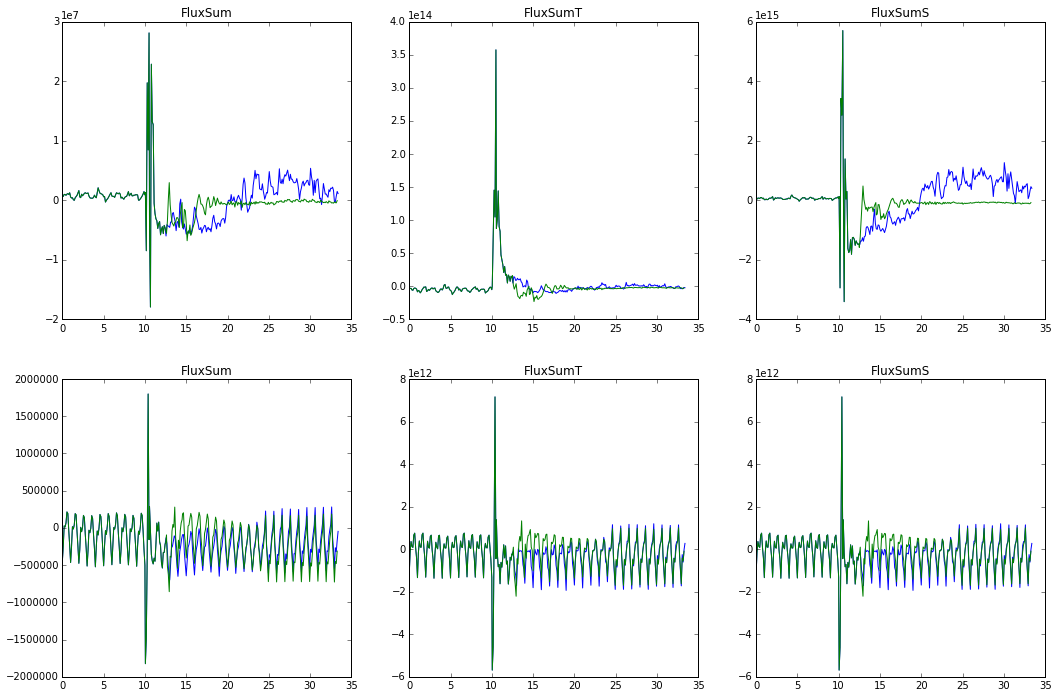

In [34]:
#monitor = {'run_pert0' : run_pert0 , 'run_pert1' : run_pert1 , 'run_pert2' : run_pert2}
monitor = {'run_pert1' : run_pert1 , 'run_pert2' : run_pert2}
variables = {'FluxSum' : 'FluxSum' , 'FluxSumS' : 'FluxSumS' , 'FluxSumT' : 'FluxSumT' }

# free-surface_anomaly evolution
def plot_flux(var_list,monitor_list,location):
    fig, axes = plt.subplots(2,3)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            axes.flat[ax_ind].plot(monitor_list[mon].years,monitor_list[mon].Fram[var])
            axes.flat[ax_ind+3].plot(monitor_list[mon].years,monitor_list[mon].Barents[var])
            #if ax_ind == 0:
            #    print monitor_list[mon].title, monitor_list[mon].color
        #axes.flat[ax_ind].set_ylabel(unity[var])
        axes.flat[ax_ind].set_title(var)
        axes.flat[ax_ind+3].set_title(var)
        ax_ind += 1
        
    fig.subplots_adjust(right=2.4,top=2.4)

plot_flux(variables,monitor,'Fram')

In [35]:
kk = 1

In [36]:
def plot_field_gif(field,vimin,vimax,cmap,setbad,unity,title,years,origin='upper'):
    # This function produces a gif animation of the field                                                                                                      
    # All the parameters are the same as the previous                                                                                                          
    vimin = vimin
    vimax = vimax
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for i in range(len(years)):

        ax.set_title("T = "+str(years[i])+" years")
        masked_array = np.ma.array(field[i,:,:], mask=np.isnan(field[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap,aspect='auto',origin=origin)
        if i == 0:
            cbar = fig.colorbar(ca , ax=ax, )
            cbar.ax.set_ylabel(unity)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)

        if i < 10:
            zeros = '000'
        elif i < 100:
            zeros = '00'
        else:
            zeros = '0'
        sout = '/scratch/general/am8e13/gifs/'
        fig.savefig(sout+str(title)+zeros+str(i)+'.png',dpi=300)
        clf
    os.system("convert -delay 1 -dispose Background +page " + str(sout) \
          + "/*.png -loop 0 " + str(sout) + "/animation_"+title+".gif")
    os.system("rm "+str(sout)+"*png")
    sout = '/scratch/general/am8e13/gifs/'
    
#plot_field_gif(run_pert0.data['S'][:,:,58*kk:80*kk,76*kk],25,37,matplotlib.cm.Accent,'black','psu','per0_S',run_pert0.years,'upper')
#plot_field_gif(run_pert0.data['T'][:,:,58*kk:80*kk,76*kk],-1,9,matplotlib.cm.spectral,'black','C','per0_T',run_pert0.years,'upper')
#plot_field_gif(run_pert0.data['V'][:,:,58*kk:80*kk,76*kk],-1,1,matplotlib.cm.seismic,'black','m/s','per0_V',run_pert0.years,'upper')

#plot_field_gif(run_pert1.data['S'][:,:,58*kk:80*kk,76*kk],25,37,matplotlib.cm.Accent,'black','psu','per1_S',run_pert1.years,'upper')
#plot_field_gif(run_pert1.data['T'][:,:,58*kk:80*kk,76*kk],-1,9,matplotlib.cm.spectral,'black','C','per1_T',run_pert1.years,'upper')
#plot_field_gif(run_pert1.data['V'][:,:,58*kk:80*kk,76*kk],-1,1,matplotlib.cm.seismic,'black','m/s','per1_V',run_pert1.years,'upper')

#plot_field_gif(run_pert2.data['S'][:,:,58*kk:80*kk,76*kk],25,37,matplotlib.cm.Accent,'black','psu','per2_S',run_pert2.years,'upper')
#plot_field_gif(run_pert2.data['T'][:,:,58*kk:80*kk,76*kk],-1,9,matplotlib.cm.spectral,'black','C','per2_T',run_pert2.years,'upper')
#plot_field_gif(run_pert2.data['V'][:,:,58*kk:80*kk,76*kk],-1,1,matplotlib.cm.seismic,'black','m/s','per2_V',run_pert2.years,'upper')

In [37]:
#plot_field(run_pert2.Fram['Flux'][time_new,:,:],run_pert2.years,-300000,300000,matplotlib.cm.seismic,'black','psu','upper')
#plot_field(run_pert2.Fram['FluxT'][time_new,:,:],run_pert2.years,-1e+11,1e+11,matplotlib.cm.seismic,'black','psu','upper')
#plot_field_gif(run_pert0.data['S'][:,:,58*kk:80*kk,76*kk],25,37,matplotlib.cm.Accent,'black','psu','per0_S',run_pert0.years,'upper')


In [38]:
n1 = 22
n2 = 33
for mon in monitor:
    monitor[mon].parts = {'FluxTop' : np.nansum(np.nansum(monitor[mon].Fram['Flux'][:,0:n1,:],axis=2),axis=1),\
                            'FluxMid' : np.nansum(np.nansum(monitor[mon].Fram['Flux'][:,n1:n2,:],axis=2),axis=1),\
                            'FluxBot' : np.nansum(np.nansum(monitor[mon].Fram['Flux'][:,n2:50,:],axis=2),axis=1),\
                            'FluxTopS' : np.nansum(np.nansum(monitor[mon].Fram['FluxS'][:,0:n1,:],axis=2),axis=1),\
                            'FluxMidS' : np.nansum(np.nansum(monitor[mon].Fram['FluxS'][:,n1:n2,:],axis=2),axis=1),\
                            'FluxBotS' : np.nansum(np.nansum(monitor[mon].Fram['FluxS'][:,n2:50,:],axis=2),axis=1),\
                          'FluxTopT' : np.nansum(np.nansum(monitor[mon].Fram['FluxT'][:,0:n1,:],axis=2),axis=1),\
                            'FluxMidT' : np.nansum(np.nansum(monitor[mon].Fram['FluxT'][:,n1:n2,:],axis=2),axis=1),\
                            'FluxBotT' : np.nansum(np.nansum(monitor[mon].Fram['FluxT'][:,n2:50,:],axis=2),axis=1)
                         }

#    monitor[mon].Barents= {'Flux' : monitor[mon].BarentsFlux,\
#                        'FluxSum' : monitor[mon].BarentsFluxSum,\
#                        'FluxS' : monitor[mon].BarentsFluxS,\
#                        'FluxSumS' : monitor[mon].BarentsFluxSumS,\
#                        'FluxT' : monitor[mon].BarentsFluxT,\
#                       'FluxSumT' : monitor[mon].BarentsFluxSumT}

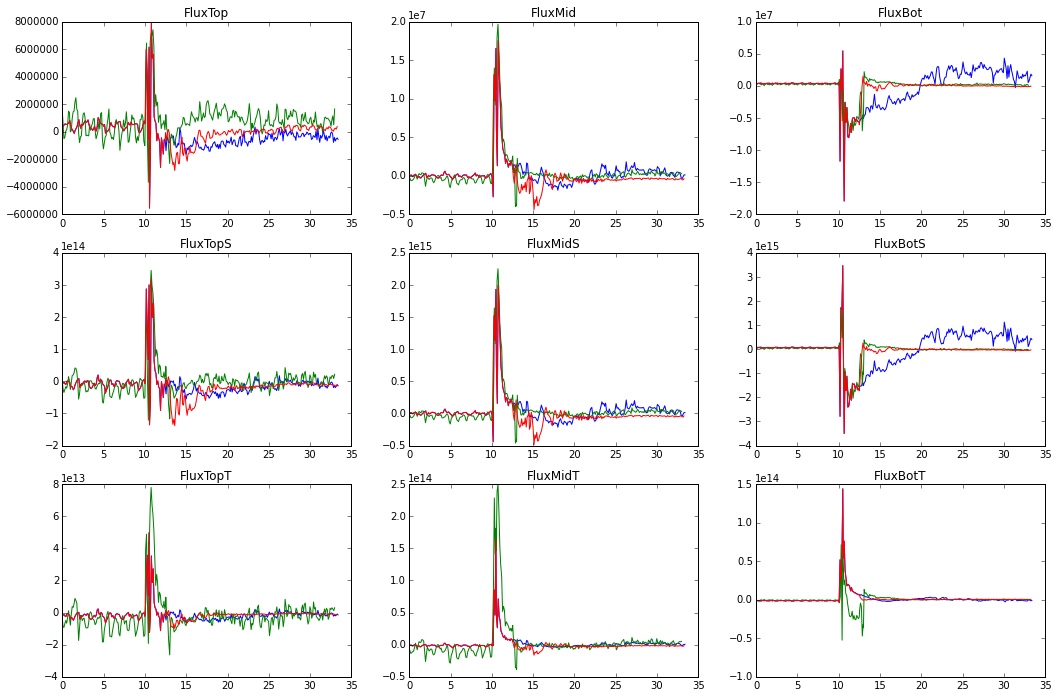

In [39]:
monitor = {'run_pert0' : run_pert0 , 'run_pert1' : run_pert1 , 'run_pert2' : run_pert2}
#monitor = {'run_pert1' : run_pert1 , 'run_pert2' : run_pert2}
variables = {'FluxSum' : 'FluxSum' , 'FluxSumS' : 'FluxSumS' , 'FluxSumT' : 'FluxSumT' }
pos = {'FluxTop':'FluxTop' , 'FluxMid':'FluxMid' , 'FluxBot':'FluxBot' ,\
          'FluxTopS':'FluxTopS' , 'FluxMidS':'FluxMidS' , 'FluxBotS':'FluxBotS',\
          'FluxTopT':'FluxTopT' , 'FluxMidT':'FluxMidT' , 'FluxBotT':'FluxBotT'}
pos1 = ['FluxTop','FluxMid','FluxBot','FluxTopS','FluxMidS','FluxBotS','FluxTopT','FluxMidT','FluxBotT']
# free-surface_anomaly evolution
def plot_flux(var_list,location):
    fig, axes = plt.subplots(3,3)
    ax_ind = 0
    for var in pos1:  
        for mon in monitor:
            axes.flat[ax_ind].plot(monitor[mon].years,monitor[mon].Fram[var])
            #axes.flat[ax_ind+3].plot(monitor[mon].years,monitor[mon].Barents[var])
            #if ax_ind == 0:
            #    print monitor_list[mon].title, monitor_list[mon].color
        #axes.flat[ax_ind].set_ylabel(unity[var])
        axes.flat[ax_ind].set_title(var)
        ax_ind += 1
        
    fig.subplots_adjust(right=2.4,top=2.4)

plot_flux(variables,'Fram')

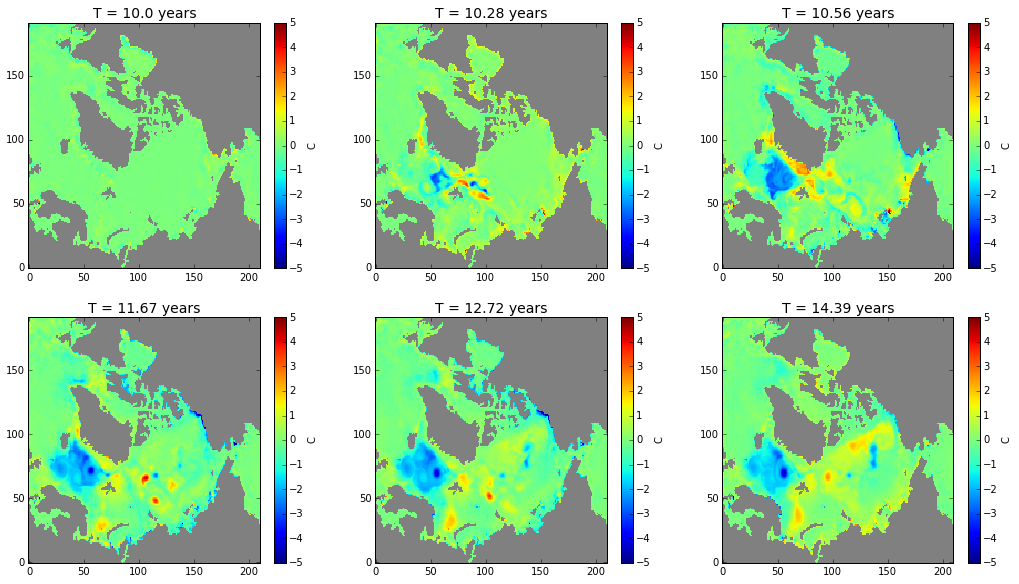

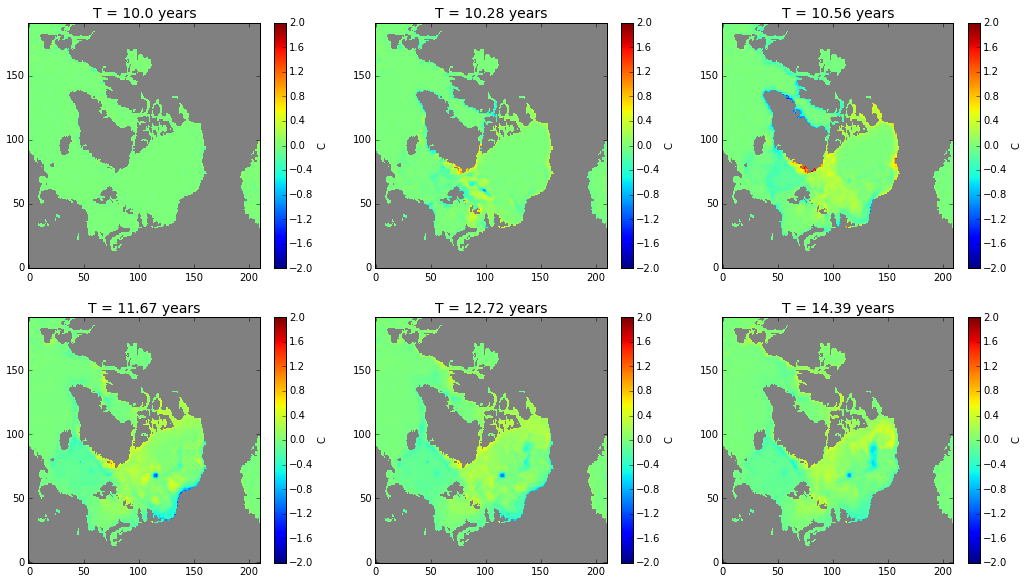

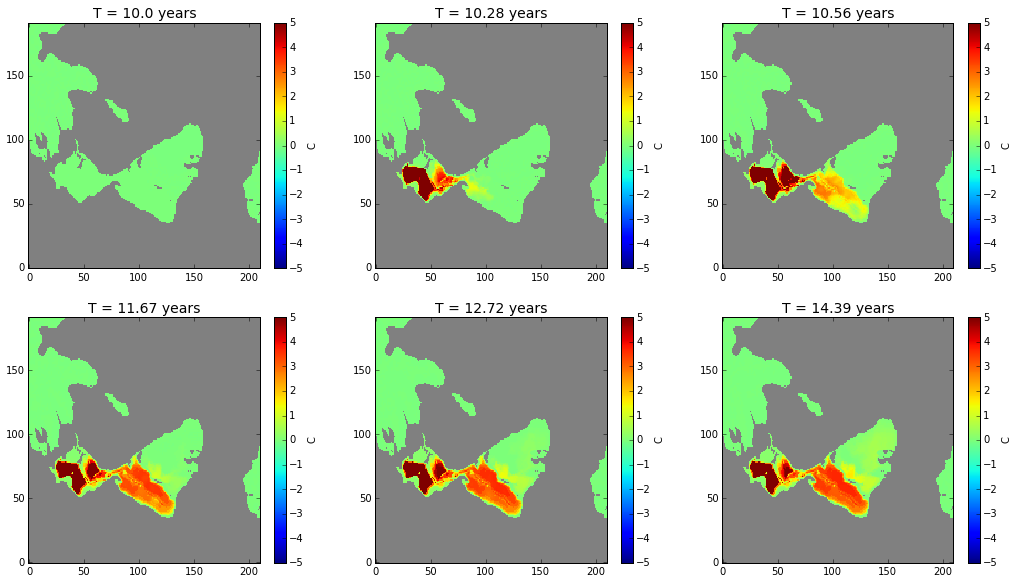

In [40]:
plot_field(np.nanmean(run_pert2.data['S'][time_new,0:10,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['S'][0:20,0:10,:,:],axis=1),axis=0),\
           run_pert1.years[time_new],-5,5,matplotlib.cm.jet,'grey','C')

plot_field(np.nanmean(run_pert2.data['S'][time_new,10:30,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['S'][0:20,10:30,:,:],axis=1),axis=0),\
           run_pert1.years[time_new],-2,2,matplotlib.cm.jet,'grey','C')

plot_field(np.nanmean(run_pert2.data['S'][time_new,30:50,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['S'][0:20,30:50,:,:],axis=1),axis=0),\
           run_pert1.years[time_new],-5,5,matplotlib.cm.jet,'grey','C')